In [1]:
import numpy as np
import pandas as pd

# 读取 .npz 文件
npz_file = np.load('./data/PEMS08/PEMS08.npz')

# 获取三维数组（假设数组的名字是 'arr_0'，根据实际情况调整）
array = npz_file['data']

# 将三维数组展平成二维数组
reshaped_array = array.reshape(-1, 3)

# 使用 pandas 将二维数组写入 CSV 文件
df = pd.DataFrame(reshaped_array, columns=['flow', 'occupy', 'speed'])
df.to_csv('./PEMS08_npz.csv', index=False)

In [2]:
import numpy as np

data = np.load('./data/PEMS08/PEMS08.npz')
data['data'].shape

(17856, 170, 3)

In [2]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('./pems08_test_target.csv')

# 输出行数和列数
print(f"CSV 文件的行数: {df.shape[0]}")
print(f"CSV 文件的列数: {df.shape[1]}")

CSV 文件的行数: 606390
CSV 文件的列数: 12


In [3]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('./pems08_astgcn_prediction.csv')

# 输出行数和列数
print(f"CSV 文件的行数: {df.shape[0]}")
print(f"CSV 文件的列数: {df.shape[1]}")

CSV 文件的行数: 606390
CSV 文件的列数: 12


In [4]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('./pems08_mstgcn_prediction.csv')

# 输出行数和列数
print(f"CSV 文件的行数: {df.shape[0]}")
print(f"CSV 文件的列数: {df.shape[1]}")

CSV 文件的行数: 606390
CSV 文件的列数: 12


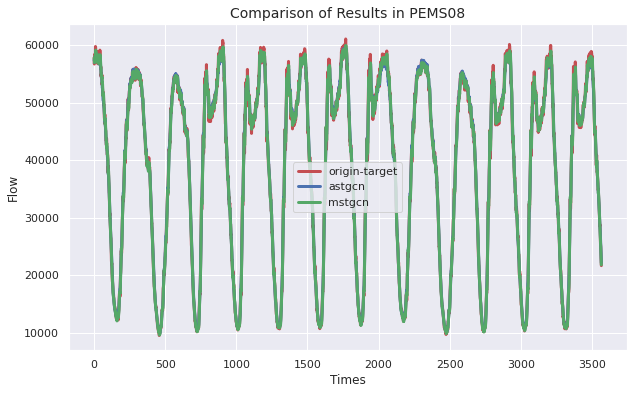

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置Seaborn样式为dark-grid
sns.set(style="darkgrid")

# import matplotlib
# matplotlib.rcParams['agg.path.chunksize'] = 10000

# 读取三个CSV文件
df1 = pd.read_csv('./pems08_test_target.csv')
df2 = pd.read_csv('./pems08_astgcn_prediction.csv')
df3 = pd.read_csv('./pems08_mstgcn_prediction.csv')

# 定义一个函数，按照每307行求和，只取每个CSV的第一列
def sum_by_sensor(df, chunk_size=170):
    # 只取第一列数据
    col_data = df.iloc[:, 0]  # 只取第一列
    n_rows = col_data.shape[0]  # 数据的行数
    summed_data = []
    for i in range(0, n_rows, chunk_size):
        chunk_sum = col_data.iloc[i:i+chunk_size].sum()  # 每个传感器的数据求和
        summed_data.append(chunk_sum)
    return np.array(summed_data)

# 对每个CSV文件进行处理，按170行分块求和
summed_df1 = sum_by_sensor(df1)
summed_df2 = sum_by_sensor(df2)
summed_df3 = sum_by_sensor(df3)

# 创建一个新的绘图
plt.figure(figsize=(10, 6))

# 绘制每个数据集的第一列（每个文件的每个传感器的总和）折线图
plt.plot(summed_df1, label='origin-target', color='r', linewidth=3)
plt.plot(summed_df2, label='astgcn', color='b', linewidth=3)
plt.plot(summed_df3, label='mstgcn', color='g', linewidth=3)

# 添加图例
plt.legend()

# 设置标题和标签
plt.title('Comparison of Results in PEMS08', fontsize=14)
plt.xlabel('Times', fontsize=12)
plt.ylabel('Flow', fontsize=12)

# 保存图像到指定路径，分辨率为600
plt.savefig('./pems08_comparison.png', dpi=1000)

# 显示图像
plt.show()


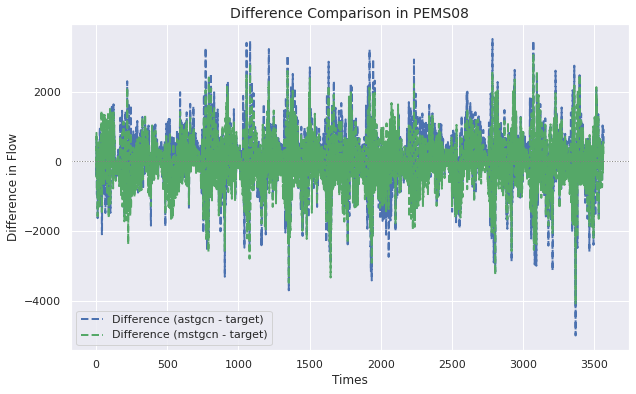

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置Seaborn样式为dark-grid
sns.set(style="darkgrid")

# 读取三个CSV文件
df1 = pd.read_csv('./pems08_test_target.csv')
df2 = pd.read_csv('./pems08_astgcn_prediction.csv')
df3 = pd.read_csv('./pems08_mstgcn_prediction.csv')

# 定义一个函数，按照每307行求和，只取每个CSV的第一列
def sum_by_sensor(df, chunk_size=170):
    # 只取第一列数据
    col_data = df.iloc[:, 0]  # 只取第一列
    n_rows = col_data.shape[0]  # 数据的行数
    summed_data = []
    for i in range(0, n_rows, chunk_size):
        chunk_sum = col_data.iloc[i:i+chunk_size].sum()  # 每个传感器的数据求和
        summed_data.append(chunk_sum)
    return np.array(summed_data)

# 对每个CSV文件进行处理，按170行分块求和
summed_df1 = sum_by_sensor(df1)  # 原始目标值
summed_df2 = sum_by_sensor(df2)  # astgcn 的预测值
summed_df3 = sum_by_sensor(df3)  # mstgcn 的预测值

# 计算差值
diff_astgcn = summed_df2 - summed_df1  # astgcn 和目标值的差值
diff_mstgcn = summed_df3 - summed_df1  # mstgcn 和目标值的差值

# 创建一个新的绘图
plt.figure(figsize=(10, 6))

# 绘制差值图
plt.plot(diff_astgcn, label='Difference (astgcn - target)', color='b', linewidth=2, linestyle='--')
plt.plot(diff_mstgcn, label='Difference (mstgcn - target)', color='g', linewidth=2, linestyle='--')

# 添加零线（参考线）
plt.axhline(0, color='gray', linestyle=':', linewidth=1)

# 添加图例
plt.legend()

# 设置标题和标签
plt.title('Difference Comparison in PEMS08', fontsize=14)
plt.xlabel('Times', fontsize=12)
plt.ylabel('Difference in Flow', fontsize=12)

# 保存图像到指定路径，分辨率为600
plt.savefig('./pems08_difference_comparison.png', dpi=1000)

# 显示图像
plt.show()
